# YOLOv4 - Como criar sua própria base de imagens

Hyago Vieira

O nosso conjunto de imagens customizado para fazer o treinamento com o YOLO deve conter:

* Imagens dos objetos que queremos reconhecer, já catalogadas (com os arquivos annotation)
* Arquivos obj.data e obj.names
* Arquivo .cfg customizado
* Arquivo train.txt (test.txt é opcional)

Há duas maneiras principais para reunir as imagens
* Baixar de um dataset ou repositório como o Open Images Dataset, um dataset da Google que disponibiliza imagens para mais de 600 classes diferentes.
A maneira mais prática atualmente para baixar as imagens do Open Images Dataset é usar a ferramenta [OIDv4 Toolkit](https://github.com/EscVM/OIDv4_ToolKit).
* A segunda maneira consiste em baixar manualmente as imagens do objeto e catalogá-las utilizando alguma ferramenta de anotação (annotation tool) para obter os txt com as anotações. Esse é um processo manual e que pode ser bastante demorado, portanto recomendamos verificar se a classe escolhida não está no Dataset do Google. Se você não encontrou no Open Images Dataset o objeto que deseja detectar então é necessário baixar manualmente. Por ser um método mais demorado e cansativo nós recomendamos fazer somente caso não tiver outra maneira de conseguir facilmente baixar essa imagens.

# Coletando e catalogando as imagens do objeto para treinamento

## Etapa 1 - Clonando o repositório da ferramenta

In [1]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 33.36 MiB/s, done.
Resolving deltas: 100% (146/146), done.


## Etapa 2 - Acessando o diretório da ferramenta

In [2]:
cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


## Etapa 3 - Instalando todas as bibliotecas necessárias

In [3]:
!pip3 install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


## Etapa 4 - Fazendo o download das imagens

### Conjunto de imagens de Treinamento

- https://storage.googleapis.com/openimages/web/index.html

In [4]:
!python main.py downloader --classes Person Boat Watercraft Canoe Lifejacket --type_csv train --limit 500 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Person', 'Boat', 'Watercraft', 'Canoe', 'Lifejacket'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...14

### Conjunto de imagens de Validação

In [5]:
!python main.py downloader --classes Person Boat Watercraft Canoe Lifejacket --type_csv test --limit 100 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Person', 'Boat', 'Watercraft', 'Canoe', 'Lifejacket'] together.
   [ERROR] | Missing the test-annotations-bbox.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] y
...100%, 4

## Etapa 5 - Convertendo os arquivos de anotação

### 1. Colocar as classes no arquivo classes.txt

In [11]:
!cat classes.txt

Aqui
colocamos
cada
classe
em 
uma 
linha

In [12]:
!echo -e 'Person\nBoat\nWatercraft\nCanoe\nLifejacket' > classes.txt

In [13]:
!cat classes.txt

Person
Boat
Watercraft
Canoe
Lifejacket


### 2. Baixar o arquivo converter_annotations.py e adicione-o ao diretório

## Conecte-se ao google colab

In [15]:
!unzip /content/drive/MyDrive/TreinamentoYOLO.zip -d /content/

Archive:  /content/drive/MyDrive/TreinamentoYOLO.zip
   creating: /content/TreinamentoYOLO/
  inflating: /content/__MACOSX/._TreinamentoYOLO  
  inflating: /content/TreinamentoYOLO/.DS_Store  
  inflating: /content/__MACOSX/TreinamentoYOLO/._.DS_Store  
  inflating: /content/TreinamentoYOLO/converter_annotations.py  
  inflating: /content/__MACOSX/TreinamentoYOLO/._converter_annotations.py  
  inflating: /content/TreinamentoYOLO/gerar_test.py  
  inflating: /content/__MACOSX/TreinamentoYOLO/._gerar_test.py  
  inflating: /content/TreinamentoYOLO/gerar_train.py  
  inflating: /content/__MACOSX/TreinamentoYOLO/._gerar_train.py  


In [16]:
ls

classes.txt  images/  LICENSE  main.py  modules/  OID/  README.md  requirements.txt


In [21]:
!cp /content/TreinamentoYOLO/converter_annotations.py ./

### 3. Executar o arquivo de conversão



In [22]:
!python converter_annotations.py

Subdiretorio atual: test
Convertendo os annotations para a classe:  Person_Boat_Watercraft_Canoe_Lifejacket
100% 457/457 [00:18<00:00, 24.51it/s]
Subdiretorio atual: train
Convertendo os annotations para a classe:  Person_Boat_Watercraft_Canoe_Lifejacket
100% 2464/2464 [02:05<00:00, 19.64it/s]


# Caso queira fazer na mão a imagem e bound box, é masi ou menos isso

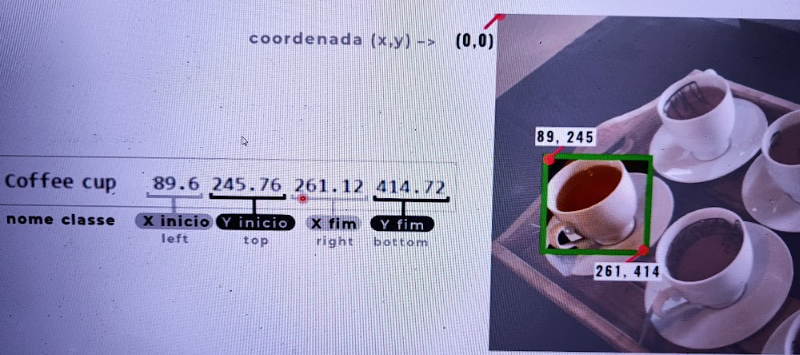

## Etapa 6 - Compactar o dataset

In [63]:
cd OID/Dataset/train

/content/OIDv4_ToolKit/OID/Dataset/train


In [64]:
ls

obj/


In [65]:
!zip -r ../../../obj.zip obj -x obj/Label/*

  adding: obj/ (stored 0%)
  adding: obj/80d8a51b13a28a0b.txt (deflated 35%)
  adding: obj/a9c4a81ba04b1a7e.jpg (deflated 0%)
  adding: obj/d68fc9ec45e79937.jpg (deflated 0%)
  adding: obj/a0897c9f8ffa4daa.jpg (deflated 0%)
  adding: obj/5578ca4e973cc00c.txt (deflated 11%)
  adding: obj/927a9cb60f83b2d0.jpg (deflated 0%)
  adding: obj/adb35ea43e01051b.txt (deflated 66%)
  adding: obj/d177ce2164a63ff7.txt (deflated 28%)
  adding: obj/45811705e0267f07.jpg (deflated 0%)
  adding: obj/aa02f9b909e4e2d1.jpg (deflated 0%)
  adding: obj/eceb10991fc86646.txt (deflated 58%)
  adding: obj/332da898f31f06f0.txt (deflated 47%)
  adding: obj/73beb5f3addbd491.txt (deflated 31%)
  adding: obj/92b90391ab21dcfd.jpg (deflated 0%)
  adding: obj/e4df618a35ab7d67.txt (deflated 19%)
  adding: obj/489e110d6b933218.txt (deflated 10%)
  adding: obj/ffdd9919ef830d4b.txt (deflated 21%)
  adding: obj/1b022a70fdb58a8e.jpg (deflated 0%)
  adding: obj/7f4ee81ef41571c7.txt (deflated 61%)
  adding: obj/9f62640c5f807c56.

In [68]:
ls

obj/


In [72]:
cd /content/OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [73]:
!cp ./obj.zip /content/drive/MyDrive

In [74]:
ls

classes.txt               images/  main.py   obj.zip  README.md
converter_annotations.py  LICENSE  modules/  OID/     requirements.txt


In [76]:
cd /content/OIDv4_ToolKit/OID/Dataset/test

/content/OIDv4_ToolKit/OID/Dataset/test


In [77]:
!zip -r ../../../../valid.zip valid -x valid/Label/*

  adding: valid/ (stored 0%)
  adding: valid/a8fddebb6bf03af2.jpg (deflated 0%)
  adding: valid/fec81d791990680a.jpg (deflated 0%)
  adding: valid/b7167b9a1eb98525.txt (deflated 22%)
  adding: valid/ecfa228ffc15d606.jpg (deflated 0%)
  adding: valid/73d31239e770e452.txt (deflated 42%)
  adding: valid/b1146f02c6eebcf8.txt (deflated 52%)
  adding: valid/28664bec74bba3fe.jpg (deflated 0%)
  adding: valid/1efd08fa9bfee48f.txt (deflated 52%)
  adding: valid/fe905f529a157892.jpg (deflated 0%)
  adding: valid/85d4f32053ebfa0e.txt (deflated 57%)
  adding: valid/7787f4ce9a7403ef.txt (deflated 29%)
  adding: valid/e2ef65947dffde36.jpg (deflated 1%)
  adding: valid/2abe0c7d03ee80a6.jpg (deflated 0%)
  adding: valid/66ebe29050953b9a.txt (deflated 17%)
  adding: valid/d2083c6a51da75c4.txt (deflated 22%)
  adding: valid/399ce226d2ddfb08.txt (deflated 24%)
  adding: valid/3ff28b60167c7709.jpg (deflated 0%)
  adding: valid/9f5e2f971e0b5415.jpg (deflated 0%)
  adding: valid/7bf87a08d43b43e4.jpg (deflat

In [80]:
cd ..

/content/OIDv4_ToolKit


In [81]:
ls

classes.txt               images/  main.py   obj.zip  README.md         valid.zip
converter_annotations.py  LICENSE  modules/  OID/     requirements.txt


In [83]:
!cp ./valid.zip /content/drive/MyDrive

In [47]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.39 MiB | 14.67 MiB/s, done.
Resolving deltas: 100% (10666/10666), done.


In [85]:
cd ../darknet/

/content/darknet


In [86]:
!make

chmod +x *.sh


## Etapa 7 - Definindo os arquivos de configuração

### Modificações no .cfg

In [87]:
!cp cfg/yolov4.cfg /content/drive/MyDrive/yolov4_custom.cfg

### Modificações no obj.names e obj.data

In [96]:
cd ../darknet

/content/darknet


In [97]:
!touch obj.names
!touch obj.data

In [98]:
!cp obj.names /content/drive/MyDrive/obj.names
!cp obj.data /content/drive/MyDrive/obj.data

## Etapa 8 - Gerando o arquivo train.txt e test.txt

In [100]:
ls

3rdparty/       DarknetConfig.cmake.in  image_yolov3.sh*        obj/         vcpkg.json
backup/         darknet_images.py       image_yolov4.sh*        obj.data     vcpkg.json.opencv23
build/          darknet.py              include/                obj.names    video_yolov3.sh*
build.ps1*      darknet_video.py        json_mjpeg_streams.sh*  package.xml  video_yolov4.sh*
cfg/            data/                   LICENSE                 README.md
cmake/          docker-compose.yml      Makefile                results/
CMakeLists.txt  Dockerfile.cpu          net_cam_v3.sh*          scripts/
darknet*        Dockerfile.gpu          net_cam_v4.sh*          src/


In [101]:
cd /content/OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [102]:
!unzip obj.zip -d ./data

Archive:  obj.zip
   creating: ./data/obj/
  inflating: ./data/obj/80d8a51b13a28a0b.txt  
  inflating: ./data/obj/a9c4a81ba04b1a7e.jpg  
  inflating: ./data/obj/d68fc9ec45e79937.jpg  
  inflating: ./data/obj/a0897c9f8ffa4daa.jpg  
  inflating: ./data/obj/5578ca4e973cc00c.txt  
  inflating: ./data/obj/927a9cb60f83b2d0.jpg  
  inflating: ./data/obj/adb35ea43e01051b.txt  
  inflating: ./data/obj/d177ce2164a63ff7.txt  
  inflating: ./data/obj/45811705e0267f07.jpg  
  inflating: ./data/obj/aa02f9b909e4e2d1.jpg  
  inflating: ./data/obj/eceb10991fc86646.txt  
  inflating: ./data/obj/332da898f31f06f0.txt  
  inflating: ./data/obj/73beb5f3addbd491.txt  
  inflating: ./data/obj/92b90391ab21dcfd.jpg  
  inflating: ./data/obj/e4df618a35ab7d67.txt  
  inflating: ./data/obj/489e110d6b933218.txt  
  inflating: ./data/obj/ffdd9919ef830d4b.txt  
  inflating: ./data/obj/1b022a70fdb58a8e.jpg  
  inflating: ./data/obj/7f4ee81ef41571c7.txt  
  inflating: ./data/obj/9f62640c5f807c56.jpg  
  inflating: ./da

In [103]:
!unzip valid.zip -d ./data

Archive:  valid.zip
   creating: ./data/valid/
  inflating: ./data/valid/a8fddebb6bf03af2.jpg  
  inflating: ./data/valid/fec81d791990680a.jpg  
  inflating: ./data/valid/b7167b9a1eb98525.txt  
  inflating: ./data/valid/ecfa228ffc15d606.jpg  
  inflating: ./data/valid/73d31239e770e452.txt  
  inflating: ./data/valid/b1146f02c6eebcf8.txt  
  inflating: ./data/valid/28664bec74bba3fe.jpg  
  inflating: ./data/valid/1efd08fa9bfee48f.txt  
  inflating: ./data/valid/fe905f529a157892.jpg  
  inflating: ./data/valid/85d4f32053ebfa0e.txt  
  inflating: ./data/valid/7787f4ce9a7403ef.txt  
  inflating: ./data/valid/e2ef65947dffde36.jpg  
  inflating: ./data/valid/2abe0c7d03ee80a6.jpg  
  inflating: ./data/valid/66ebe29050953b9a.txt  
  inflating: ./data/valid/d2083c6a51da75c4.txt  
  inflating: ./data/valid/399ce226d2ddfb08.txt  
  inflating: ./data/valid/3ff28b60167c7709.jpg  
  inflating: ./data/valid/9f5e2f971e0b5415.jpg  
  inflating: ./data/valid/7bf87a08d43b43e4.jpg  
  inflating: ./data/va

In [114]:
cd /content/OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [115]:
!python /content/TreinamentoYOLO/gerar_train.py

Diretório atual: /content/OIDv4_ToolKit
Diretório alterado para: /content/OIDv4_ToolKit/data/obj
Diretório atual: /content/OIDv4_ToolKit/data


In [116]:
!python /content/TreinamentoYOLO/gerar_test.py

In [117]:
cd data

/content/OIDv4_ToolKit/data


In [118]:
!cp train.txt /content/drive/MyDrive

In [119]:
!cp test.txt /content/drive/MyDrive